<a href="https://colab.research.google.com/github/HasanFil/TASK/blob/main/W10_AlperHoca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Minst handwritten datasını kullanarak bir adet CNN ağ yapısı geliştiriniz. Ağ yapısı: Conv2D(32,(3,3)) relu activation Conv2D(64,(3,3)) relu activation Maxpooling ((2,2)) Conv2D(128,(3,3)) relu activation Conv2D(64,(3,3)) relu activation Flatten() Dense 256 dropout 0.25 dense 128 dropout 0.3 dense layer for last (Buradaki bilgileri sizden bekliyorum.)

In [4]:

from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.optimizers import SGD
from keras.utils.data_utils import random
from google.colab.patches import cv2_imshow    
from time import time
import numpy as np 
import matplotlib.pyplot as plt

In [5]:

(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [8]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [9]:
y_test.shape

(10000, 10)

In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape= x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), activation="relu"))

model.add(Flatten())
model.add(Dense(256)) 
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.3))

model.add(Dense(y_train.shape[1], activation="softmax")) 
model.compile(loss = 'categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

print(model.summary())    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                        

Epoch 1/10
1875/1875 [==============================] - 18s 5ms/step - loss: 0.1239 - accuracy: 0.9623 - val_loss: 0.0415 - val_accuracy: 0.9864
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0365 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0257 - val_accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0533 - val_accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0257 - accuracy: 0.9925 - val_loss: 0.0458 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.0410 - val_accu

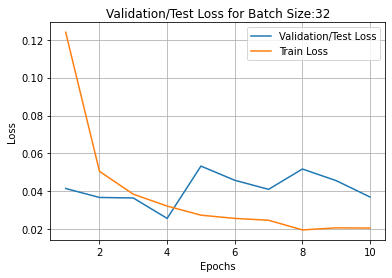

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0348 - val_accuracy: 0.9934
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0364 - val_accuracy: 0.9924
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.0417 - val_accuracy: 0.9927
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.0709 - val_accuracy: 0.9889
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0595 - val_accuracy: 0.9905
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.0656 - val_accuracy: 0.9909
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0111 - accuracy: 0.9974 - val_loss: 0.0481 - val_accuracy: 0.9919
Epoch 

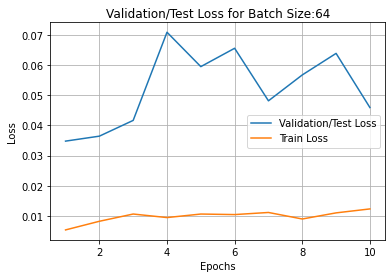

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0387 - val_accuracy: 0.9934
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 8.1318e-04 - accuracy: 0.9998 - val_loss: 0.0482 - val_accuracy: 0.9933
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0514 - val_accuracy: 0.9930
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0512 - val_accuracy: 0.9938
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0516 - val_accuracy: 0.9936
Epoch 6/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 0.0534 - val_accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.0530 - val_accuracy: 0.

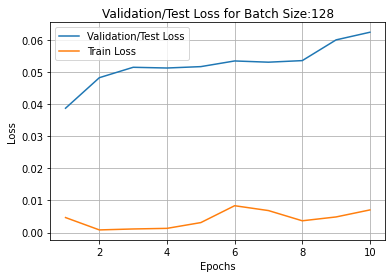

Epoch 1/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0597 - val_accuracy: 0.9932
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 7.5630e-04 - accuracy: 0.9998 - val_loss: 0.0578 - val_accuracy: 0.9934
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 5.7787e-04 - accuracy: 0.9999 - val_loss: 0.0580 - val_accuracy: 0.9931
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 1.9841e-04 - accuracy: 0.9999 - val_loss: 0.0574 - val_accuracy: 0.9931
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 4.3097e-04 - accuracy: 0.9998 - val_loss: 0.0641 - val_accuracy: 0.9935
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 1.7381e-04 - accuracy: 0.9999 - val_loss: 0.0683 - val_accuracy: 0.9938
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 2.4743e-04 - accuracy: 0.9999 - val_loss: 0.077

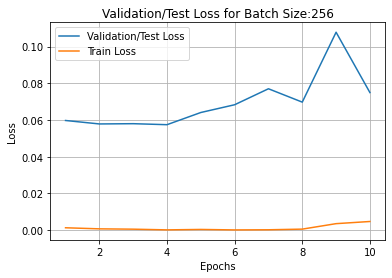

Epoch 1/10
118/118 [==============================] - 5s 34ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0816 - val_accuracy: 0.9930
Epoch 2/10
118/118 [==============================] - 4s 32ms/step - loss: 7.5626e-04 - accuracy: 0.9998 - val_loss: 0.0729 - val_accuracy: 0.9938
Epoch 3/10
118/118 [==============================] - 4s 32ms/step - loss: 1.2745e-04 - accuracy: 0.9999 - val_loss: 0.0735 - val_accuracy: 0.9933
Epoch 4/10
118/118 [==============================] - 4s 33ms/step - loss: 1.2122e-04 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9941
Epoch 5/10
118/118 [==============================] - 4s 32ms/step - loss: 2.8841e-04 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9937
Epoch 6/10
118/118 [==============================] - 4s 32ms/step - loss: 5.1091e-04 - accuracy: 0.9998 - val_loss: 0.0750 - val_accuracy: 0.9933
Epoch 7/10
118/118 [==============================] - 4s 32ms/step - loss: 4.3126e-04 - accuracy: 0.9998 - val_loss: 0.070

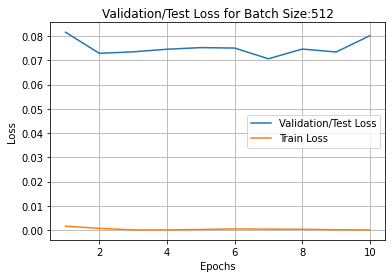

Epoch 1/10
59/59 [==============================] - 6s 81ms/step - loss: 1.6002e-04 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9931
Epoch 2/10
59/59 [==============================] - 4s 62ms/step - loss: 3.4273e-04 - accuracy: 0.9999 - val_loss: 0.0791 - val_accuracy: 0.9927
Epoch 3/10
59/59 [==============================] - 4s 61ms/step - loss: 1.2554e-05 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9929
Epoch 4/10
59/59 [==============================] - 4s 63ms/step - loss: 3.6793e-05 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9930
Epoch 5/10
59/59 [==============================] - 4s 61ms/step - loss: 1.4215e-05 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9931
Epoch 6/10
59/59 [==============================] - 4s 61ms/step - loss: 8.3730e-05 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9931
Epoch 7/10
59/59 [==============================] - 4s 63ms/step - loss: 7.6032e-06 - accuracy: 1.0000 - val_loss: 0.0814 - val_ac

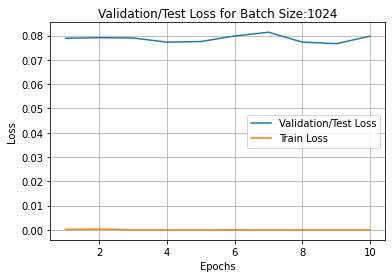

In [11]:

history = [1,2,3,4,5,6]
batch_size = [32,64,128,256,512,1024]

for i in range(6):
    start = time()
    history[i] = model.fit(x_train, y_train, batch_size=batch_size[i],epochs=10,validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(f'Time for Batch Size {batch_size[i]}=> {time() - start}')
    history_dict = history[i].history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1,len(val_loss_values)+1)
    line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
    line2 = plt.plot(epochs,loss_values,label="Train Loss")
    plt.title("Validation/Test Loss for Batch Size:{}".format(batch_size[i]))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()